<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,40.664690,42.086579,47.421143,79.732825,0.011802,219.917038,219.911387,0.005652
1,0.0,1.0,52.017351,50.939145,86.178392,23.767992,-0.001664,222.901216,222.899828,0.001388
2,0.0,2.0,72.102466,22.476140,49.113635,69.911700,-0.017909,223.586033,223.608188,-0.022155
3,0.0,3.0,75.890914,96.446265,51.757535,62.818481,0.000866,296.914062,296.911758,0.002303
4,0.0,4.0,49.494715,88.537354,56.914424,51.718543,-0.017017,256.648019,256.663856,-0.015838
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,61.002620,70.411618,38.314412,48.412053,0.004677,228.145379,228.141160,0.004219
249996,999.0,246.0,99.115575,72.505468,23.822937,76.774903,0.007131,282.226014,282.219604,0.006410
249997,999.0,247.0,71.774002,23.211031,70.272907,79.198608,-0.010044,254.446505,254.458163,-0.011658
249998,999.0,248.0,24.486097,63.824958,87.215534,84.348868,-0.017911,269.857546,269.873677,-0.016131


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    40.664690  42.086579  47.421143  79.732825  0.011802  219.917038   
      1.0    52.017351  50.939145  86.178392  23.767992 -0.001664  222.901216   
      2.0    72.102466  22.476140  49.113635  69.911700 -0.017909  223.586033   
      3.0    75.890914  96.446265  51.757535  62.818481  0.000866  296.914062   
      4.0    49.494715  88.537354  56.914424  51.718543 -0.017017  256.648019   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  61.002620  70.411618  38.314412  48.412053  0.004677  228.145379   
      246.0  99.115575  72.505468  23.822937  76.774903  0.007131  282.226014   
      247.0  71.774002  23.211031  70.272907  79.198608 -0.010044  254.446505   
      248.0  24.486097  63.824958  87.215534  84.348868 -0.017911  269.857546   
      249.0  38.790373  37.957584  51.481393  63.361817  0.036028  201.627194   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    219.911387  0.005652  
      1.0    222.899828  0.001388  
      2.0    223.608188 -0.022155  
      3.0    296.911758  0.002303  
      4.0    256.663856 -0.015838  
...                 ...       ...  
999.0 245.0  228.141160  0.004219  
      246.0  282.219604  0.006410  
      247.0  254.458163 -0.011658  
      248.0  269.873677 -0.016131  
      249.0  201.593906  0.033288  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    40.664690  42.086579  47.421143  79.732825  0.011802  219.917038   
      1.0    52.017351  50.939145  86.178392  23.767992 -0.001664  222.901216   
      2.0    72.102466  22.476140  49.113635  69.911700 -0.017909  223.586033   
      3.0    75.890914  96.446265  51.757535  62.818481  0.000866  296.914062   
      4.0    49.494715  88.537354  56.914424  51.718543 -0.017017  256.648019   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  61.002620  70.411618  38.314412  48.412053  0.004677  228.145379   
      246.0  99.115575  72.505468  23.822937  76.774903  0.007131  282.226014   
      247.0  71.774002  23.211031  70.272907  79.198608 -0.010044  254.446505   
      248.0  24.486097  63.824958  87.215534  84.348868 -0.017911  269.857546   
      249.0  38.790373  37.957584  51.481393  63.361817  0.036028  201.627194   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    219.911387  0.005652  
      1.0    222.899828  0.001388  
      2.0    223.608188 -0.022155  
      3.0    296.911758  0.002303  
      4.0    256.663856 -0.015838  
...                 ...       ...  
999.0 245.0  228.141160  0.004219  
      246.0  282.219604  0.006410  
      247.0  254.458163 -0.011658  
      248.0  269.873677 -0.016131  
      249.0  201.593906  0.033288  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,40.664690,42.086579,47.421143,79.732825,0.011802,219.917038,219.911387,0.005652
1,0.0,1.0,52.017351,50.939145,86.178392,23.767992,-0.001664,222.901216,222.899828,0.001388
2,0.0,2.0,72.102466,22.476140,49.113635,69.911700,-0.017909,223.586033,223.608188,-0.022155
3,0.0,3.0,75.890914,96.446265,51.757535,62.818481,0.000866,296.914062,296.911758,0.002303
4,0.0,4.0,49.494715,88.537354,56.914424,51.718543,-0.017017,256.648019,256.663856,-0.015838
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,61.002620,70.411618,38.314412,48.412053,0.004677,228.145379,228.141160,0.004219
249996,999.0,246.0,99.115575,72.505468,23.822937,76.774903,0.007131,282.226014,282.219604,0.006410
249997,999.0,247.0,71.774002,23.211031,70.272907,79.198608,-0.010044,254.446505,254.458163,-0.011658
249998,999.0,248.0,24.486097,63.824958,87.215534,84.348868,-0.017911,269.857546,269.873677,-0.016131


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    40.664690  42.086579  47.421143  79.732825  0.011802  219.917038   
      1.0    52.017351  50.939145  86.178392  23.767992 -0.001664  222.901216   
      2.0    72.102466  22.476140  49.113635  69.911700 -0.017909  223.586033   
      3.0    75.890914  96.446265  51.757535  62.818481  0.000866  296.914062   
      4.0    49.494715  88.537354  56.914424  51.718543 -0.017017  256.648019   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  61.002620  70.411618  38.314412  48.412053  0.004677  228.145379   
      246.0  99.115575  72.505468  23.822937  76.774903  0.007131  282.226014   
      247.0  71.774002  23.211031  70.272907  79.198608 -0.010044  254.446505   
      248.0  24.486097  63.824958  87.215534  84.348868 -0.017911  269.857546   
      249.0  38.790373  37.957584  51.481393  63.361817  0.036028  201.627194   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    219.911387  0.005652  
      1.0    222.899828  0.001388  
      2.0    223.608188 -0.022155  
      3.0    296.911758  0.002303  
      4.0    256.663856 -0.015838  
...                 ...       ...  
999.0 245.0  228.141160  0.004219  
      246.0  282.219604  0.006410  
      247.0  254.458163 -0.011658  
      248.0  269.873677 -0.016131  
      249.0  201.593906  0.033288  

[250000 rows x 8 columns]

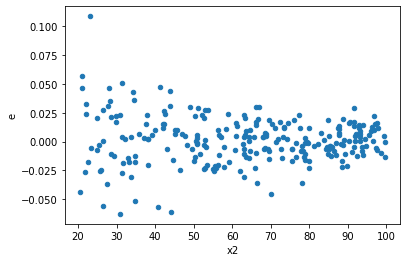

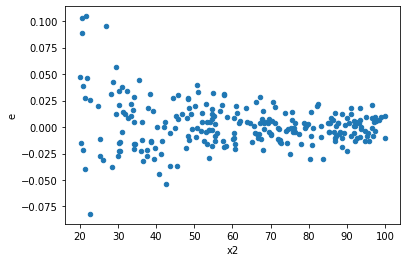

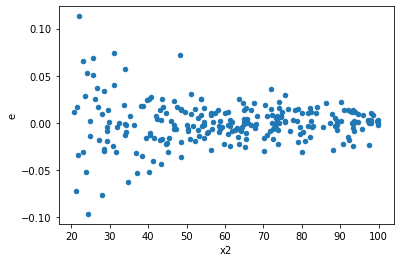

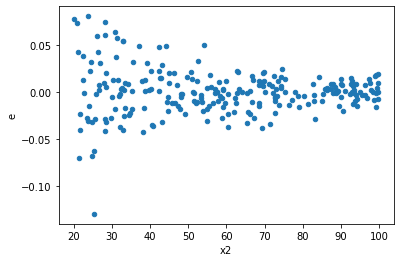

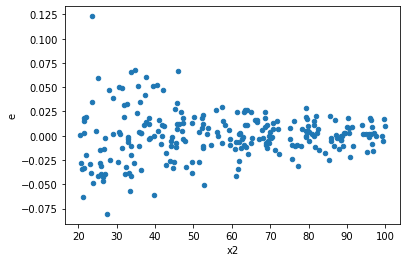

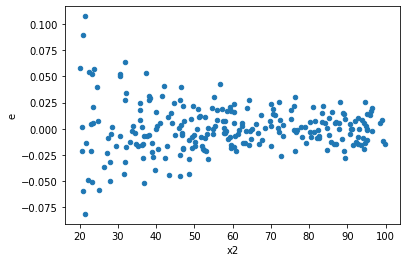

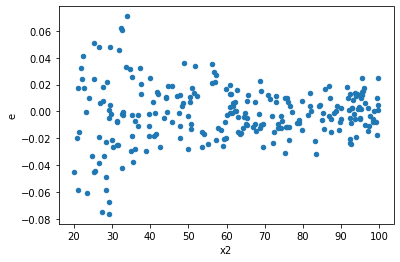

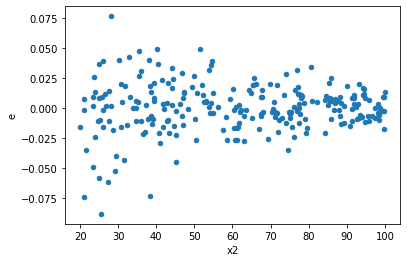

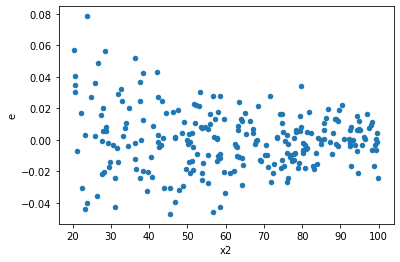

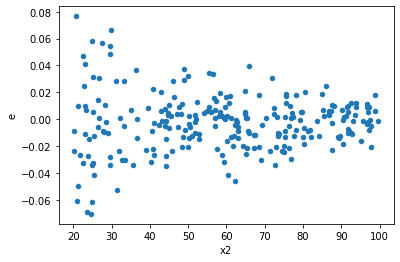

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,111.0,131.0,0.04321409827193314,0.07934978596310431,0.0003893162006480463,0.0006057235569702619,1.555865273425532,0.015190758829094264,0.9924046205854529,0.007595379414547132,Reject001=1 : Homoscedasticity
6.0,109.0,133.0,0.017818230260557476,0.09626768405992274,0.00016347000239043557,0.0007238171733828777,4.427828731867856,1.5543122344752192e-15,0.9999999999999992,7.771561172376096e-16,Reject001=0 : Heteroscedasticity
9.0,128.0,114.0,0.04784112693234267,0.05676914477645615,0.00037375880415892713,0.0004979749541794399,1.3323430742990456,0.11834155789628653,0.9408292210518567,0.059170778948143266,Reject001=1 : Homoscedasticity
10.0,123.0,119.0,0.04102243825851801,0.06391406849697065,0.0003335157581993334,0.0005370930125795853,1.6103977079805003,0.009367904088527501,0.9953160479557362,0.0046839520442637506,Reject001=0 : Heteroscedasticity
12.0,119.0,123.0,0.04629266310917895,0.06411246450150722,0.0003890139757073861,0.0005212395487927417,1.3398992872811717,0.10845566011337815,0.9457721699433109,0.054227830056689075,Reject001=1 : Homoscedasticity
17.0,110.0,132.0,0.039029483187309734,0.07370815840403862,0.0003548134835209976,0.000558395139424535,1.5737709116443135,0.012751092935131991,0.993624453532434,0.006375546467565996,Reject001=1 : Homoscedasticity
18.0,115.0,127.0,0.03063223788101658,0.04631692390687502,0.0002663672859218833,0.0003647001882431104,1.3691628346210087,0.08428330528796368,0.9578583473560182,0.04214165264398184,Reject001=1 : Homoscedasticity
20.0,132.0,110.0,0.06513343352484577,0.05558550970334772,0.0004934351024609528,0.0005053228154849792,1.0240917457325955,0.9008928039093906,0.5495535980453047,0.4504464019546953,Reject001=1 : Homoscedasticity
23.0,125.0,117.0,0.016966120118325226,0.08400128568749103,0.0001357289609466018,0.0007179597067306925,5.289657429950788,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,120.0,122.0,0.06894599353252481,0.031144763133230505,0.0005745499461043735,0.00025528494371500414,0.444321586740918,1.1423951592228403e-05,Reject001=0 : Heteroscedasticity
1.0,113.0,129.0,0.059793647333514804,0.057074792671275174,0.0005291473215355292,0.000442440253265699,0.8361381325370494,0.33029917287321336,Reject001=1 : Homoscedasticity
2.0,111.0,131.0,0.04321409827193314,0.07934978596310431,0.0003893162006480463,0.0006057235569702619,1.555865273425532,0.015190758829094264,Reject001=1 : Homoscedasticity
3.0,129.0,113.0,0.1312137957917528,0.0169812029837273,0.0010171612076880063,0.00015027613259935662,0.14774072336176902,1.6859115074246858e-23,Reject001=0 : Heteroscedasticity
4.0,120.0,122.0,0.09226093684186859,0.05553306691163464,0.000768841140348905,0.0004551890730461856,0.5920456764834643,0.004260787292122464,Reject001=0 : Heteroscedasticity
5.0,116.0,126.0,0.06866919533075448,0.059726808810751784,0.000591975821816849,0.0004740222921488237,0.8007460350221552,0.22513421154022134,Reject001=1 : Homoscedasticity
6.0,109.0,133.0,0.017818230260557476,0.09626768405992274,0.00016347000239043557,0.0007238171733828777,4.427828731867856,1.5543122344752192e-15,Reject001=0 : Heteroscedasticity
7.0,121.0,121.0,0.07862463584691202,0.019931429140304237,0.0006497903789000994,0.00016472255487854742,0.2535010677710763,3.7226837559629555e-13,Reject001=0 : Heteroscedasticity
8.0,115.0,127.0,0.04978906847417681,0.040402155396899744,0.00043294842151458095,0.0003181272078496043,0.7347923956777617,0.09319905616339538,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      558
Reject001=0 : Heteroscedasticity    442
Name: Result_test, dtype: int64